In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)
np.random.randint(0, 100, (20, 2)), np.random.randint(0, 2,(20, 1))

(array([[51, 92],
        [14, 71],
        [60, 20],
        [82, 86],
        [74, 74],
        [87, 99],
        [23,  2],
        [21, 52],
        [ 1, 87],
        [29, 37],
        [ 1, 63],
        [59, 20],
        [32, 75],
        [57, 21],
        [88, 48],
        [90, 58],
        [41, 91],
        [59, 79],
        [14, 61],
        [61, 46]]),
 array([[1],
        [0],
        [1],
        [0],
        [1],
        [1],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [1],
        [1],
        [0],
        [1],
        [1],
        [1]]))

In [3]:
dir(cv2.ml)

['ANN_MLP',
 'ANN_MLP_ANNEAL',
 'ANN_MLP_BACKPROP',
 'ANN_MLP_GAUSSIAN',
 'ANN_MLP_IDENTITY',
 'ANN_MLP_LEAKYRELU',
 'ANN_MLP_NO_INPUT_SCALE',
 'ANN_MLP_NO_OUTPUT_SCALE',
 'ANN_MLP_RELU',
 'ANN_MLP_RPROP',
 'ANN_MLP_SIGMOID_SYM',
 'ANN_MLP_UPDATE_WEIGHTS',
 'ANN_MLP_create',
 'ANN_MLP_load',
 'BOOST_DISCRETE',
 'BOOST_GENTLE',
 'BOOST_LOGIT',
 'BOOST_REAL',
 'Boost',
 'Boost_DISCRETE',
 'Boost_GENTLE',
 'Boost_LOGIT',
 'Boost_REAL',
 'Boost_create',
 'Boost_load',
 'COL_SAMPLE',
 'DTREES_PREDICT_AUTO',
 'DTREES_PREDICT_MASK',
 'DTREES_PREDICT_MAX_VOTE',
 'DTREES_PREDICT_SUM',
 'DTrees',
 'DTrees_PREDICT_AUTO',
 'DTrees_PREDICT_MASK',
 'DTrees_PREDICT_MAX_VOTE',
 'DTrees_PREDICT_SUM',
 'DTrees_create',
 'DTrees_load',
 'EM',
 'EM_COV_MAT_DEFAULT',
 'EM_COV_MAT_DIAGONAL',
 'EM_COV_MAT_GENERIC',
 'EM_COV_MAT_SPHERICAL',
 'EM_DEFAULT_MAX_ITERS',
 'EM_DEFAULT_NCLUSTERS',
 'EM_START_AUTO_STEP',
 'EM_START_E_STEP',
 'EM_START_M_STEP',
 'EM_create',
 'EM_load',
 'KNEAREST_BRUTE_FORCE',
 'KNEAR

In [4]:
def generate_data(sample):
    datasize = (sample, 2)
    train_data = np.random.randint(0, 100, size=datasize)
    label = (sample, 1)
    lables = np.random.randint(0,2, size=label)

    return train_data.astype(np.float32), lables

In [5]:
data, lables = generate_data(20)
data, lables

(array([[ 8., 89.],
        [52.,  1.],
        [83., 91.],
        [59., 70.],
        [43.,  7.],
        [46., 34.],
        [77., 80.],
        [35., 49.],
        [ 3.,  1.],
        [ 5., 53.],
        [ 3., 53.],
        [92., 62.],
        [17., 89.],
        [43., 33.],
        [73., 61.],
        [99., 13.],
        [94., 47.],
        [14., 71.],
        [77., 86.],
        [61., 39.]], dtype=float32),
 array([[0],
        [1],
        [0],
        [1],
        [0],
        [0],
        [1],
        [1],
        [0],
        [1],
        [1],
        [1],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0]]))

In [6]:
def plot_data(blue, red):
    plt.figure(figsize=(10, 6))
    plt.scatter(blue[:, 0], blue[:, 1], c='b', marker='s', s=180)
    plt.scatter(red[:, 0], red[:, 1], c='r', marker='^', s=180)

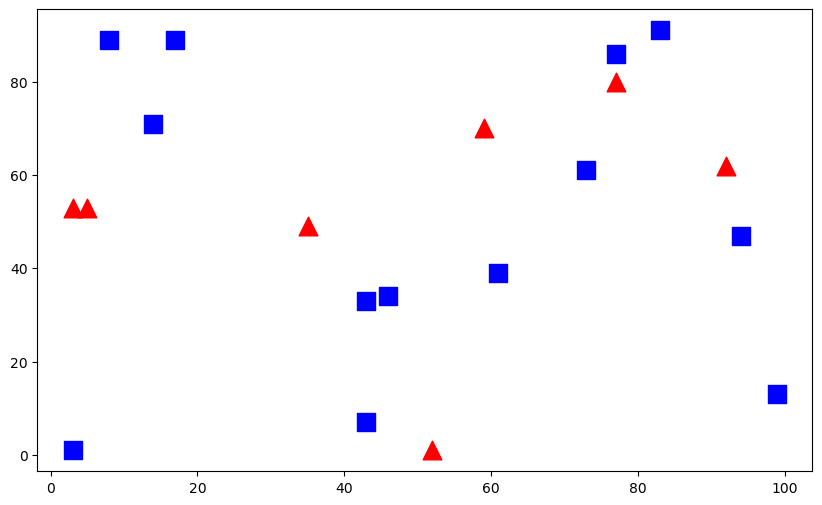

In [7]:
blue = data[lables.ravel() == 0]
red = data[lables.ravel() == 1]
plot_data(blue, red)

In [8]:
knn = cv2.ml.KNearest_create()
knn.train(data, cv2.ml.ROW_SAMPLE, lables)

True

In [9]:
new, _ = generate_data(1)
new

array([[ 8., 87.]], dtype=float32)

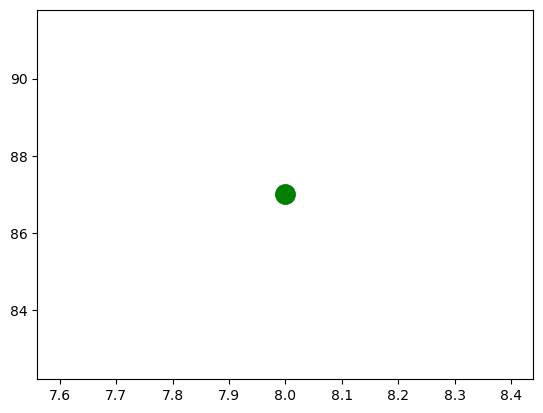

In [10]:
plt.plot(new[0,0], new[0,1], 'go', markersize=14)

In [11]:
knn.findNearest(new, 1)

(0.0,
 array([[0.]], dtype=float32),
 array([[0.]], dtype=float32),
 array([[4.]], dtype=float32))

In [12]:
knn.setDefaultK(1)
knn.predict(new)

(0.0, array([[0.]], dtype=float32))